In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split ,RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import classification_report
from toai.imports import *




import os


In [95]:
from toai.imports import *

1. Do exploratory data analysis.
2. Do feature engineering.
3. Do feature preprocessing.
4. Build a machine learning model.
5. Build a deep learning model using encoder for categorical columns.
6. Build a deep learning model using embeddings.
7. Compare the deep learning models and the machine learning model.

In [2]:
tf.__version__

'2.0.0-beta1'

In [34]:
!unzip -qq red-wine-quality-cortez-et-al-2009.zip

In [3]:
df = pd.read_csv('winequality-red.csv',low_memory = False)


## first look at data

In [242]:
df.head(5).T

,0,1,2,3,4
fixed acidity,7.4,7.8,7.8,11.2,7.4
volatile acidity,0.7,0.88,0.76,0.28,0.7
citric acid,0,0,0.04,0.56,0
residual sugar,1.9,2.6,2.3,1.9,1.9
chlorides,0.076,0.098,0.092,0.075,0.076
free sulfur dioxide,11,25,15,17,11
total sulfur dioxide,34,67,54,60,34
density,0.9978,0.9968,0.997,0.998,0.9978
pH,3.51,3.2,3.26,3.16,3.51
sulphates,0.56,0.68,0.65,0.58,0.56


In [43]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [118]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [45]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [50]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
df.shape

(1599, 12)

## Data Exploration

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


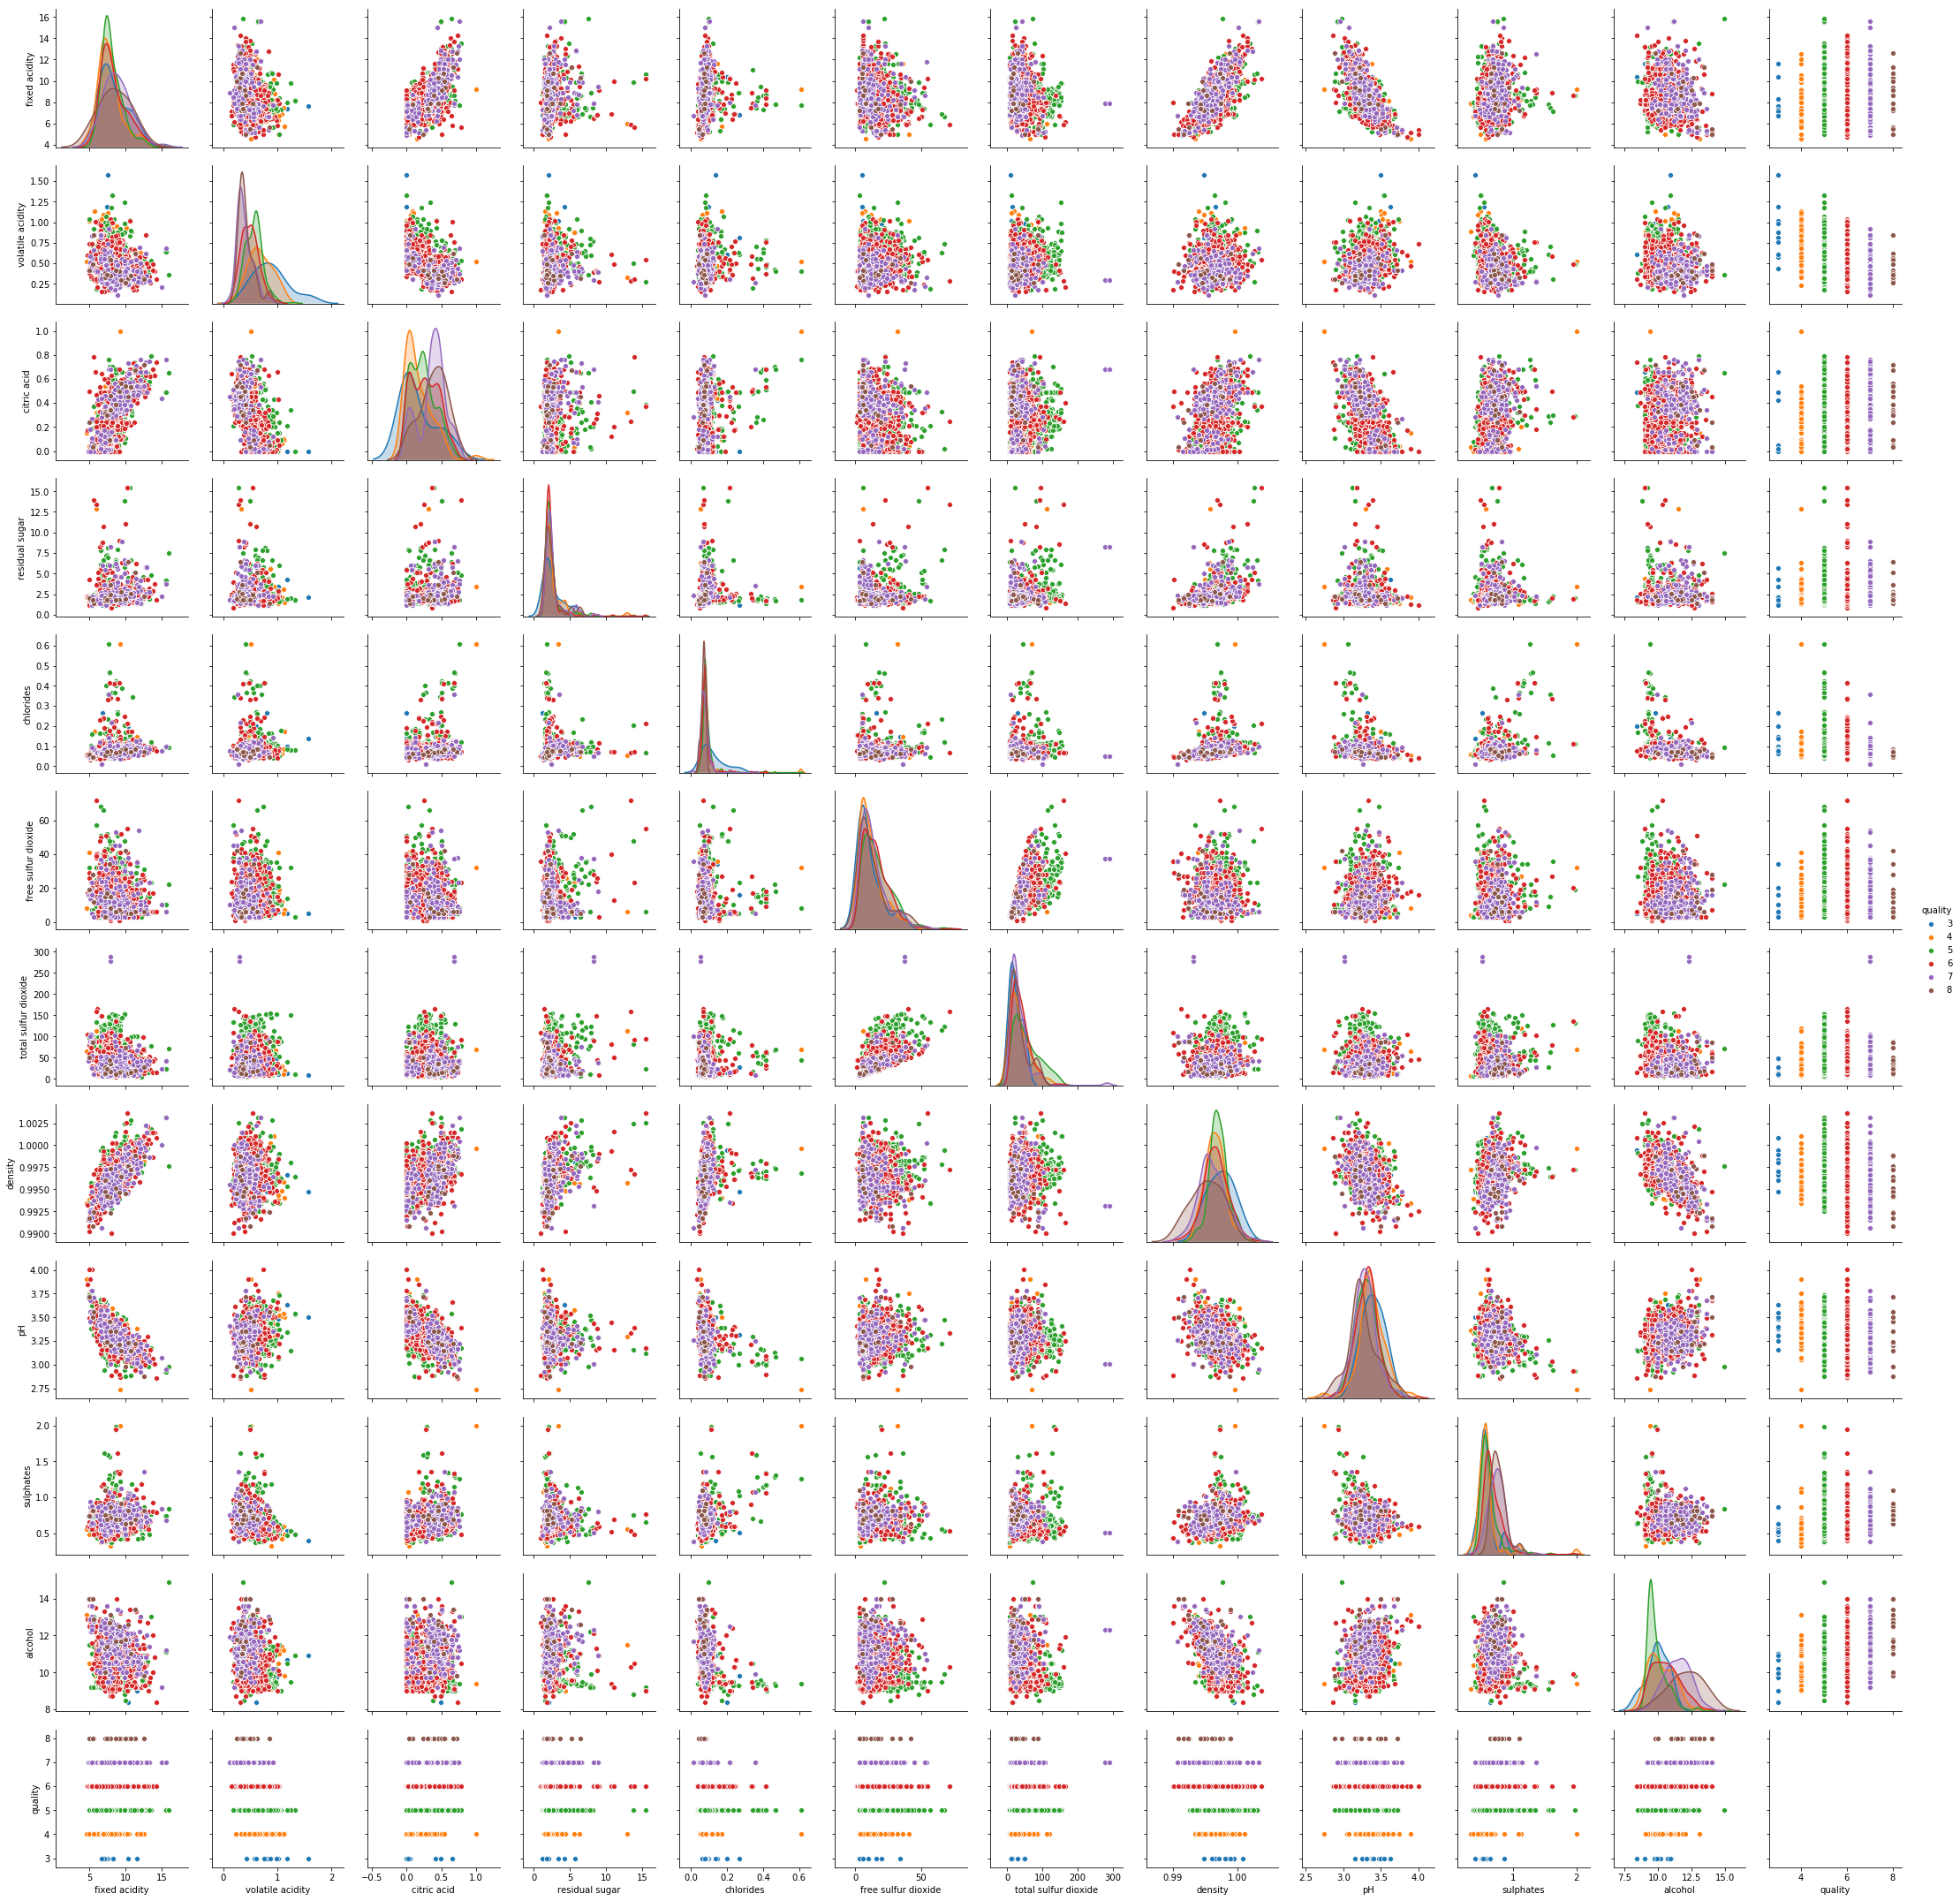

In [194]:
sns.pairplot(df,hue='quality')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


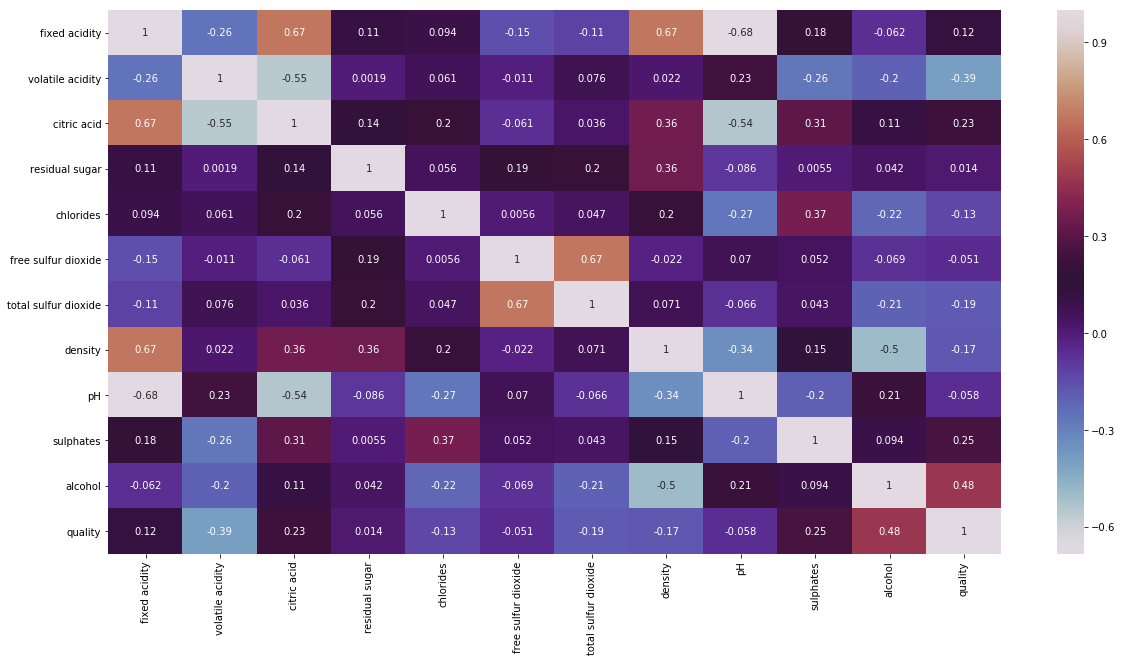

In [52]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='twilight')

df.corr()


#alcohol
#sulphates
#volatile acidity
#citric acid

In [458]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

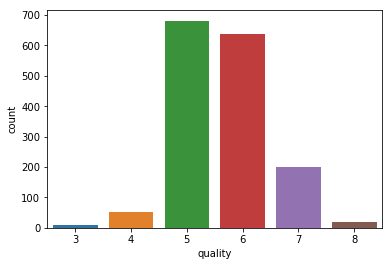

In [88]:
sns.countplot(x='quality', data=df)

Text(0.5, 1.0, 'quality  vs alcohol')

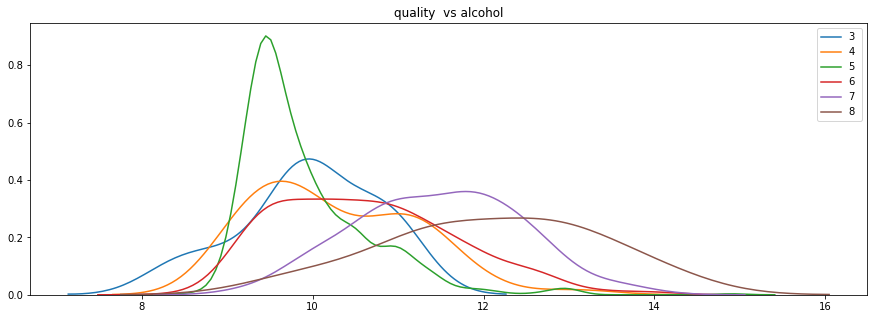

In [114]:
plt.figure(figsize = (15, 5))

df[['quality', 'alcohol']]
sns.kdeplot(df.loc[df['quality'] == 3, 'alcohol'], label = '3 ')
sns.kdeplot(df.loc[df['quality'] == 4, 'alcohol'], label = '4 ')
sns.kdeplot(df.loc[df['quality'] == 5, 'alcohol'], label = '5 ')
sns.kdeplot(df.loc[df['quality'] == 6, 'alcohol'], label = '6 ')
sns.kdeplot(df.loc[df['quality'] == 7, 'alcohol'], label = '7 ')
sns.kdeplot(df.loc[df['quality'] == 8, 'alcohol'], label = '8 ')
plt.title('quality  vs alcohol')

In [12]:
def plot_graphs(feature_1,feature_2, df):
    fig, axs = plt.subplots(ncols=4)
    fig.set_figwidth(30)
    fig.set_figheight(8)
    plt.suptitle(feature_1 + ' vs. ' + feature_2)
    
    
    sns.boxenplot(x=feature_1, y=feature_2, data=df,ax=axs[0])
    sns.boxplot(x=feature_1, y=feature_2, data=df,ax=axs[1])
    sns.violinplot(x=feature_1, y=feature_2, data=df,inner="points",ax=axs[2])
    sns.barplot(x=feature_1, y=feature_2, data=df,ax=axs[3])
    
    
    

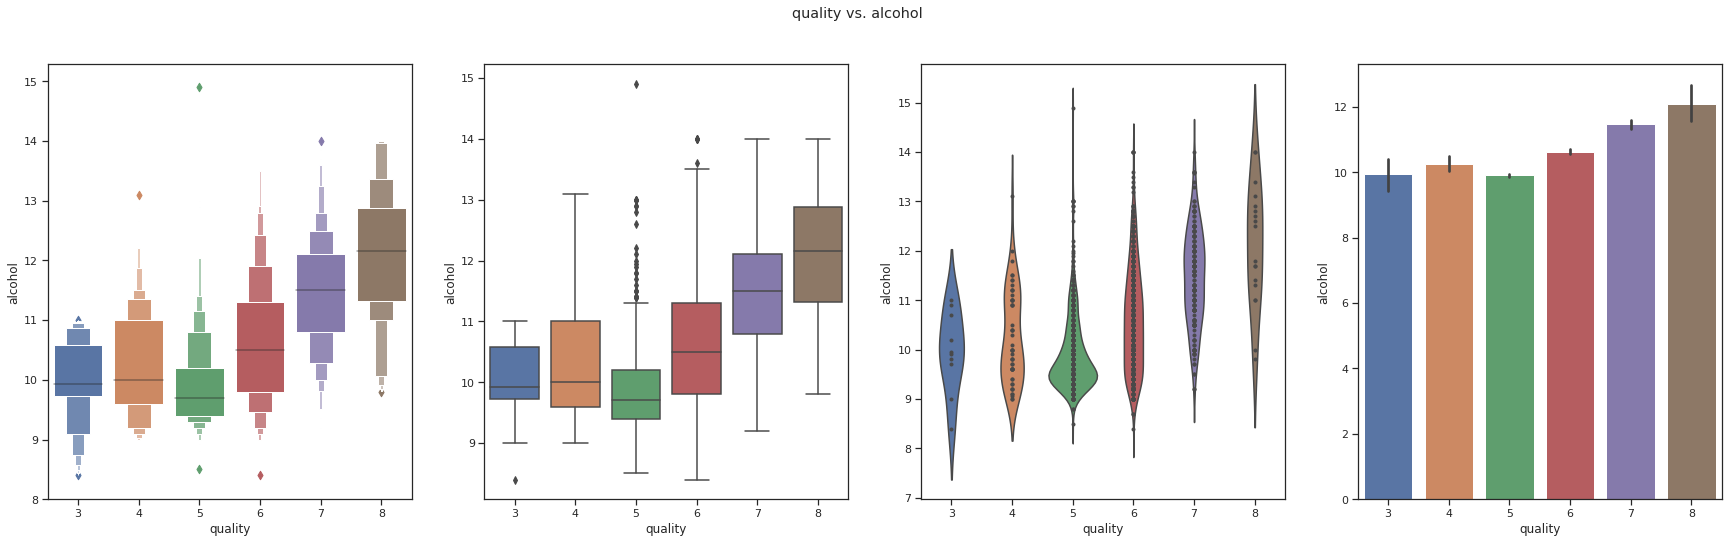

In [523]:
plot_graphs('quality','alcohol', df)

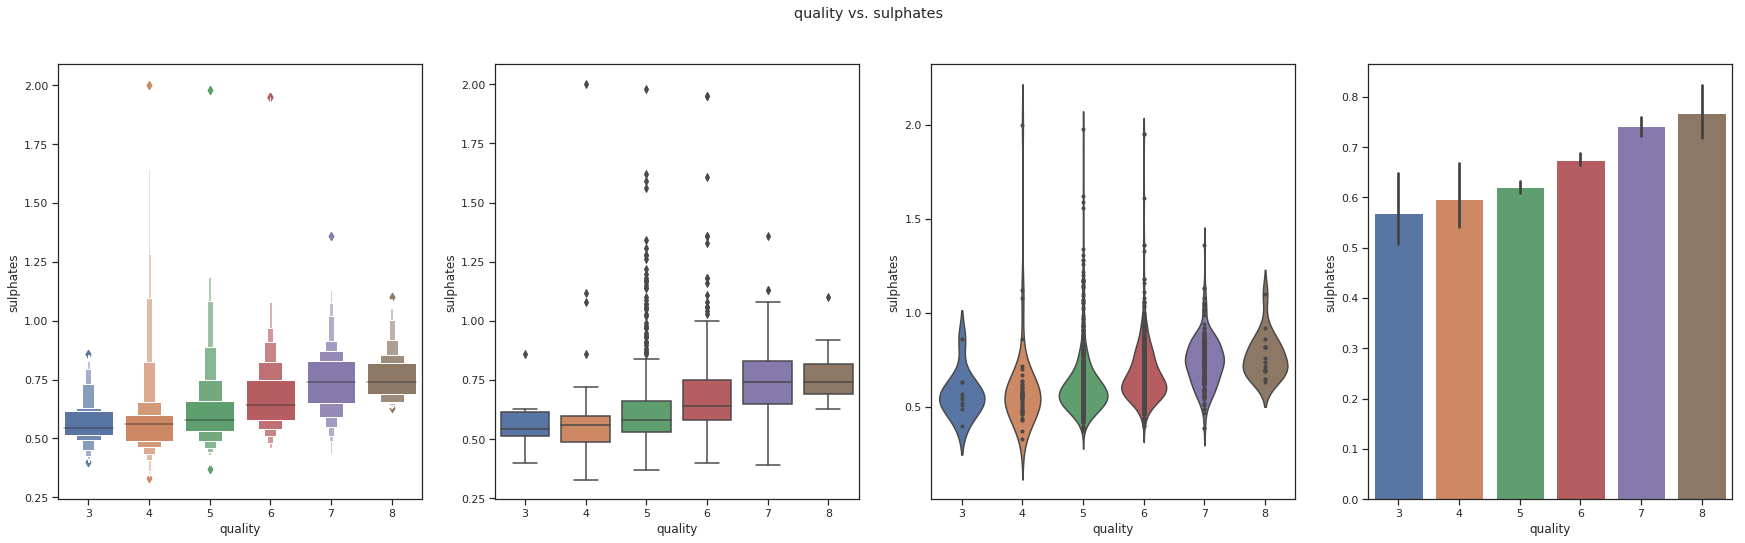

In [450]:
plot_graphs('quality','sulphates', df)

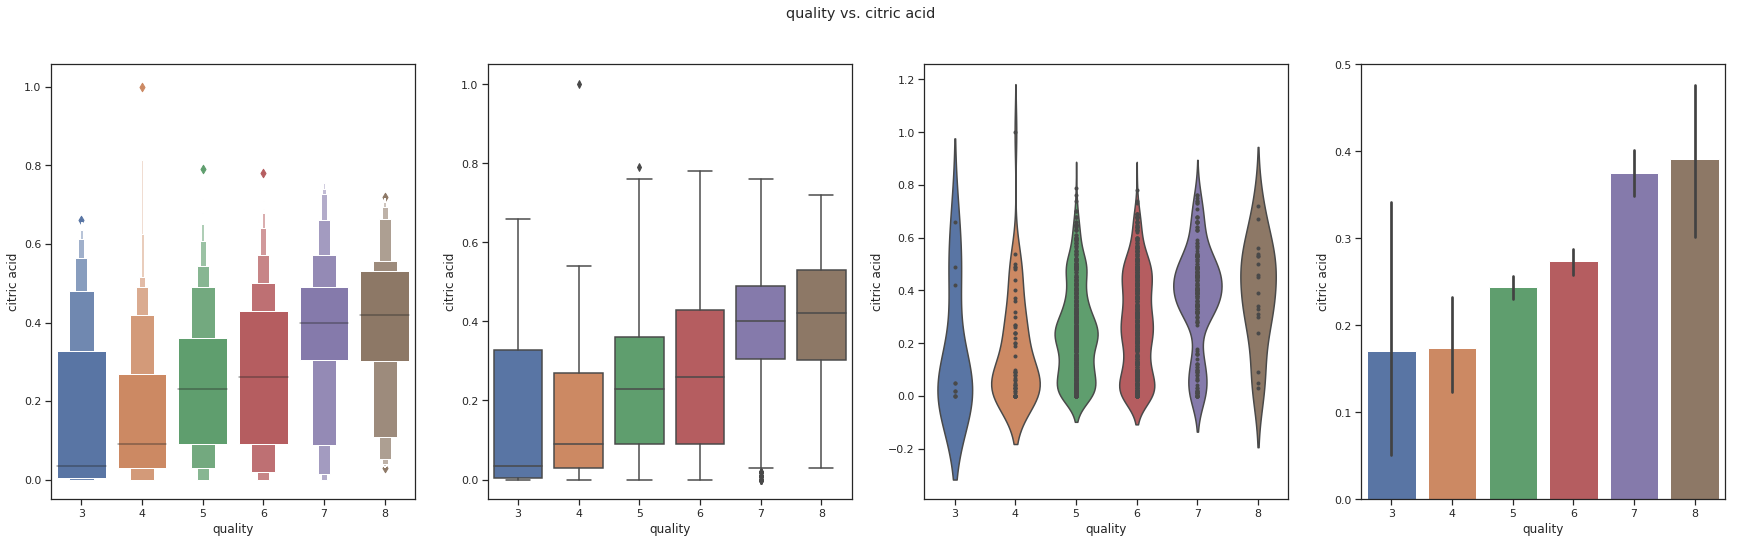

In [451]:
plot_graphs('quality','citric acid', df)

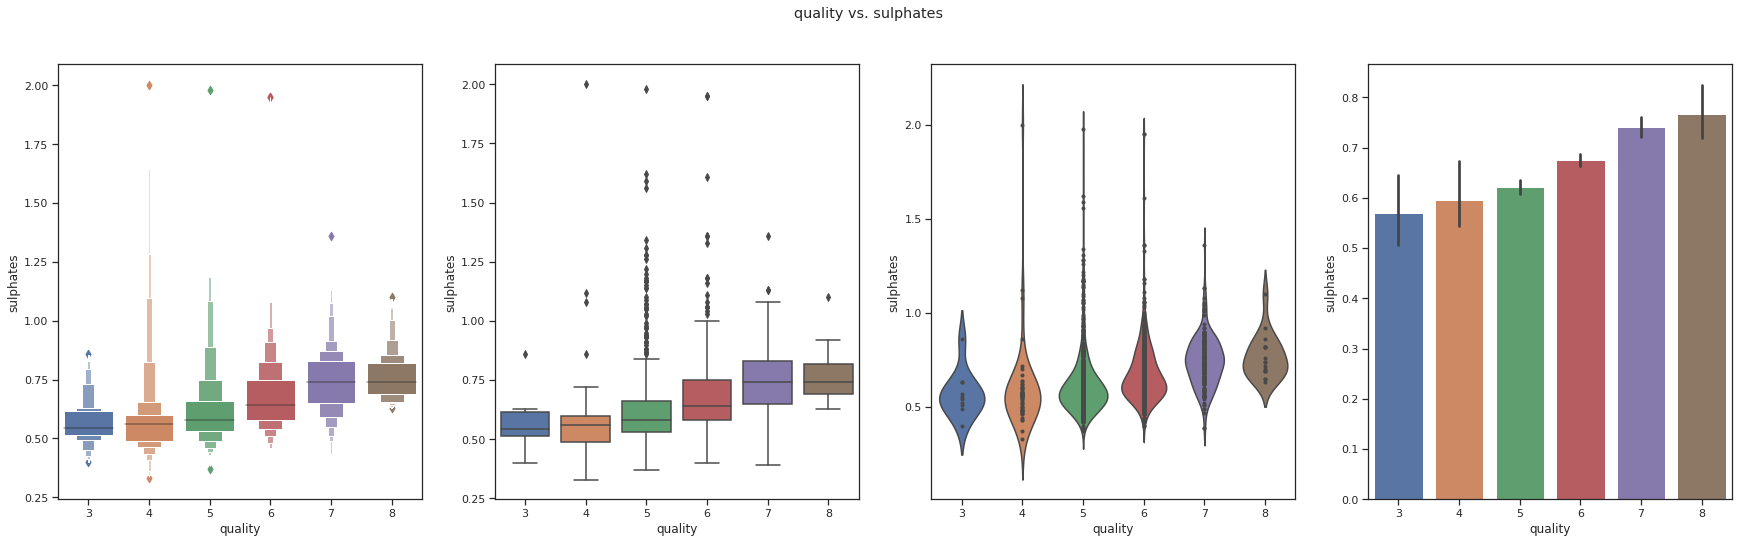

In [460]:
plot_graphs('quality','sulphates', df)

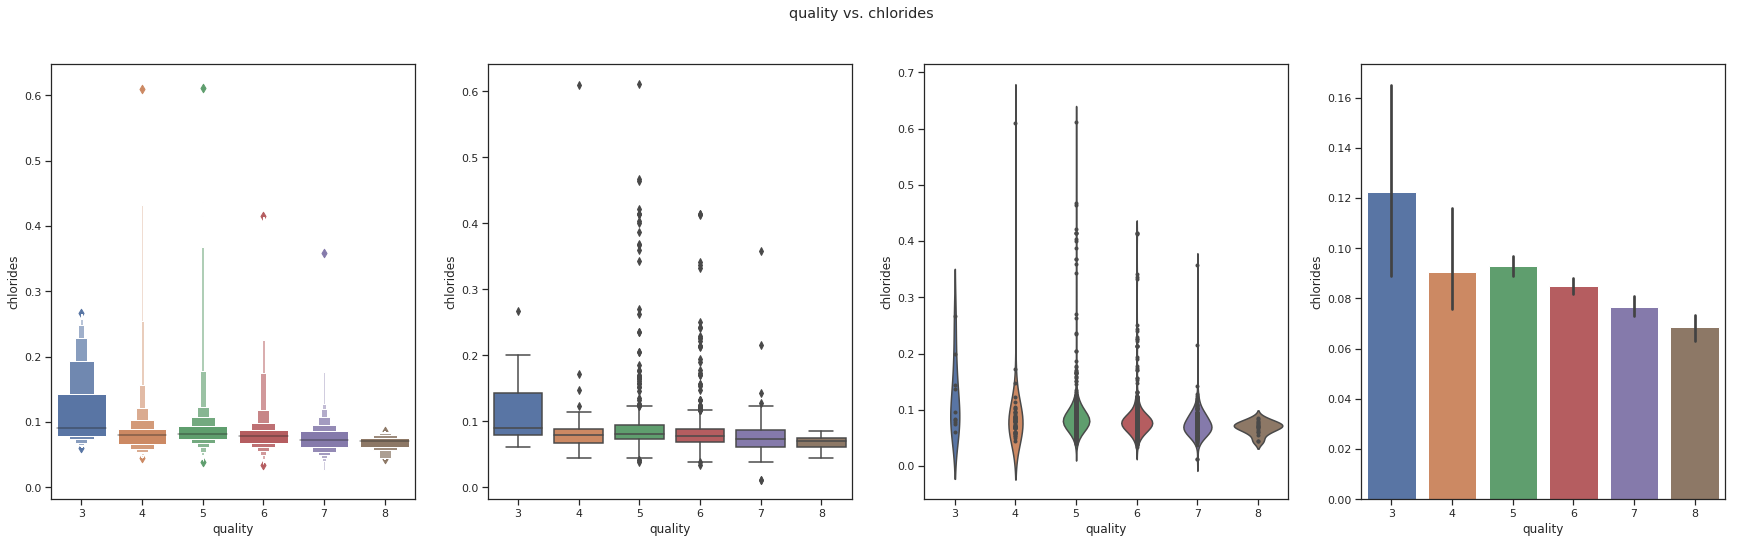

In [453]:
plot_graphs('quality','chlorides', df)

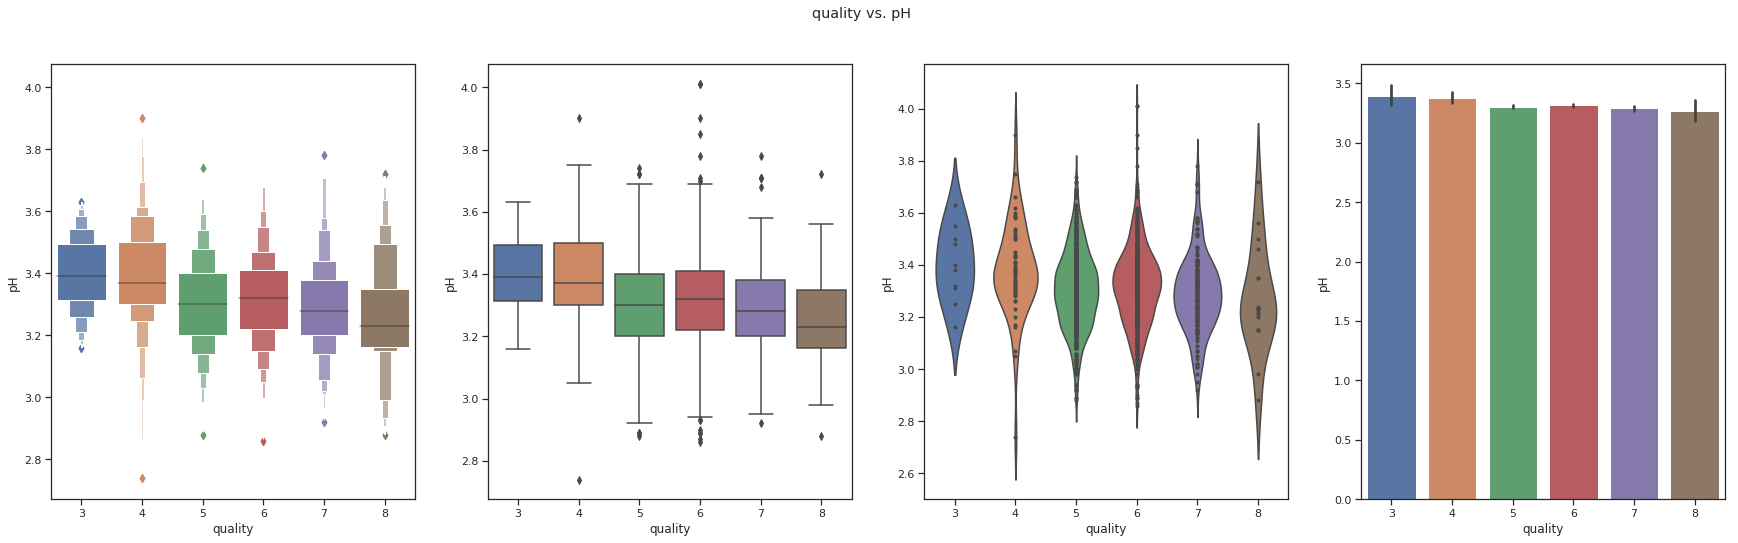

In [457]:
plot_graphs('quality','pH', df)

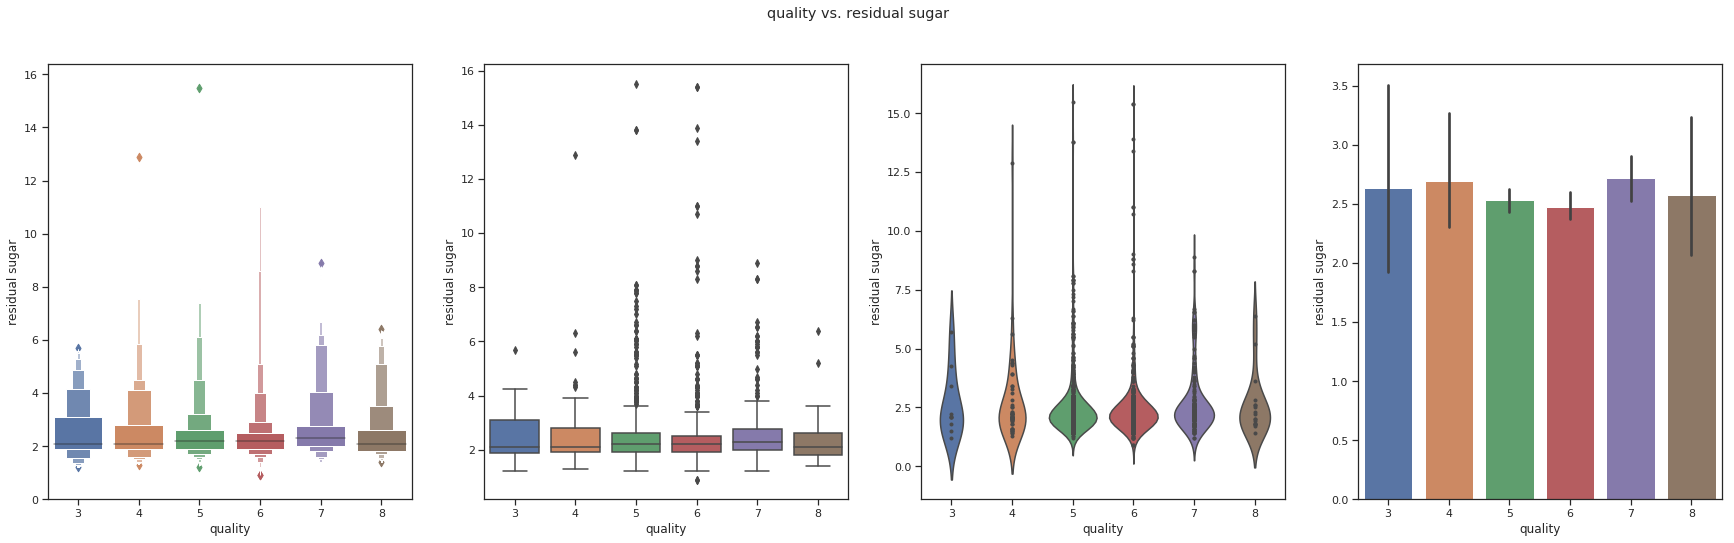

In [459]:
plot_graphs('quality','residual sugar', df)

In [383]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

## data preprocessing

In [4]:
scaler = StandardScaler()

In [5]:
scaled_features = scaler.fit_transform(df.drop('quality',axis=1))

In [6]:
feature_columns = df.columns.to_list()
feature_columns.remove('quality')

In [7]:
df_features = pd.DataFrame(scaled_features, columns = feature_columns)

In [10]:
train_data, test_data, train_labels, test_labels = train_test_split(df_features,df['quality'],test_size = 0.2 )

In [11]:
val_data, test_data,val_labels,test_labels =train_test_split(test_data, test_labels, test_size = 0.5)

In [12]:
[x.shape for x in (train_data, train_labels, test_data, test_labels,val_data,val_labels)]

[(1279, 11), (1279,), (160, 11), (160,), (160, 11), (160,)]

In [13]:
lr = LogisticRegression()
lr.fit(train_data, train_labels)
predictions = lr.predict(test_data)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [14]:
predictions

array([6, 5, 5, 7, 5, 5, 6, 6, 5, 5, 6, 5, 5, 6, 6, 6, 6, 5, 5, 5, 5, 5,
       5, 5, 6, 6, 5, 6, 6, 5, 5, 5, 5, 5, 6, 6, 5, 5, 6, 6, 6, 6, 5, 6,
       5, 6, 5, 5, 6, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6, 6, 5, 5, 6, 6, 5, 5,
       5, 6, 5, 6, 6, 6, 6, 6, 5, 5, 7, 5, 5, 6, 5, 6, 6, 6, 5, 5, 6, 5,
       6, 5, 7, 5, 6, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 6, 5, 6,
       5, 5, 6, 5, 6, 5, 5, 6, 6, 5, 6, 5, 5, 6, 6, 6, 5, 6, 6, 5, 5, 6,
       6, 6, 5, 7, 5, 6, 7, 5, 6, 5, 6, 6, 6, 6, 5, 5, 6, 5, 6, 5, 5, 6,
       6, 5, 5, 5, 5, 6])

In [15]:
print(confusion_matrix(test_labels, predictions))
print(accuracy_score(test_labels, predictions))


[[ 0  1  2  0  0]
 [ 0 59 10  0  0]
 [ 0 21 37  3  0]
 [ 0  1 20  1  0]
 [ 0  0  4  1  0]]
0.60625


## change target value to categorical data


In [14]:
cat_wine = []
for i in df['quality']:
    if i >= 1 and i <= 3:
        cat_wine.append('1')
    elif i >= 4 and i <= 7:
        cat_wine.append('2')
    elif i >= 8 and i <= 10:
        cat_wine.append('3')
df['cat_wine'] = cat_wine

In [15]:
x = df.iloc[:,:11]
y = df['cat_wine']


In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)



In [17]:
#Principal Component Analysis
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)



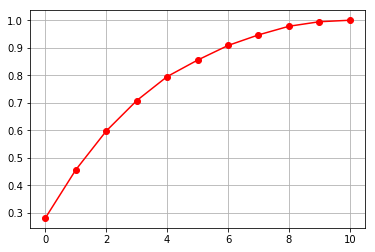

In [18]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

In [19]:
pca_new = PCA(n_components=8)
x_new = pca_new.fit_transform(x)



In [20]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.20)

In [21]:
x_val, x_data,y_val,y_labels =train_test_split(x_test, y_test, test_size = 0.5)

In [22]:
lr = LogisticRegression(solver='lbfgs',multi_class='auto')
lr.fit(x_train, y_train)
lr_predict = lr.predict(x_test)



In [23]:
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)


In [24]:
print(lr_conf_matrix)
print(lr_acc_score)

[[  0   3   0]
 [  0 314   0]
 [  0   3   0]]
0.98125


In [88]:
rs_lgbmr = RandomizedSearchCV(
    estimator=Pipeline([
        ("lgbmr", lgb.LGBMRegressor(n_jobs=1)),
    ]),
    param_distributions={
        'lgbmr__num_leaves': np.arange(10, 100),
        'lgbmr__min_data_in_leaf': np.arange(5, 100),
        'lgbmr__max_bin': np.arange(10, 100),
        'lgbmr__learning_rate': np.geomspace(1e-4, 1, 10),
        'lgbmr__n_estimators': np.arange(1, 100),
        'lgbmr__boosting_type': ['gbdt', 'dart', 'goss'],
        'lgbmr__max_depth': np.arange(1, 100),
    },
    n_iter=300,
    cv=3,
    n_jobs=-1,
    verbose=1,
)





NameError: name 'lgb' is not defined

In [191]:
rs_lgbmr.fit(x_train, y_train)

Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:   29.3s finished
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=Pipeline(memory=None,
     steps=[('lgbmr', LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=100, n_jobs=1, num_leaves=31, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0))]),
          fit_params=None, iid='warn', n_iter=300, n_jobs=-1,
          param_distributions={'lgbmr__num_leaves': array([10, 11, ..., 98, 99]), 'lgbmr__min_data_in_leaf': array([ 5,  6, ..., 98, 99]), 'lgbmr__max_bin': array([10, 11, ..., 98, 99]), 'lgbmr__learning_rate': array([1.00000e-04, 2.78256e-04, 7.74264e-04, 2.15443e-03, 5.99484e-03,
       1.66810e-02, 4.64159e-02, 1.29155e-01, 3.59381e-01, 1.00000e+00]), 'lgbmr__n_estimators': array([ 1,  2, 

In [195]:
rs_lgbmr.best_params_

{'lgbmr__num_leaves': 53,
 'lgbmr__n_estimators': 27,
 'lgbmr__min_data_in_leaf': 94,
 'lgbmr__max_depth': 36,
 'lgbmr__max_bin': 69,
 'lgbmr__learning_rate': 0.046415888336127774,
 'lgbmr__boosting_type': 'dart'}

In [196]:
rs_lgbmr.best_estimator_

Pipeline(memory=None,
     steps=[('lgbmr', LGBMRegressor(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.046415888336127774,
       max_bin=69, max_depth=36, min_child_samples=20,
       min_child_weight=0.001, min_data_in_leaf=94, min_split_gain=0.0,
       n_estimators=27, n_jobs=1, num_leaves=53, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0))])

In [197]:
print('lgbmr SCORE=',rs_lgbmr.best_score_)

lgbmr SCORE= 0.034307511683807204


In [180]:

rfc = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions={
        "n_estimators": np.arange(10, 500),
        "min_samples_leaf": np.arange(1, 100),
        "max_depth": np.arange(1, 100),
        "max_features": ['sqrt', 'log2', 0.1],
    },
    n_iter=100,
    n_jobs=-1,
    cv=5,
    verbose=1,
)

In [181]:
rfc.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.5min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': array([ 10,  11, ..., 498, 499]), 'min_samples_leaf': array([ 1,  2, ..., 98, 99]), 'max_depth': array([ 1,  2, ..., 98, 99]), 'max_features': ['sqrt', 'log2', 0.1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=1)

In [182]:
rfc.best_params_

{'n_estimators': 452,
 'min_samples_leaf': 22,
 'max_features': 0.1,
 'max_depth': 18}

In [183]:
rfc.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=18, max_features=0.1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=22, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=452, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [188]:
print('RFC SCORE =', rfc.best_score_)

RFC SCORE = 0.9796716184519155


## NN

In [16]:
def make_classifier(n_layers,layer_size,n_classes,final_activation, input_shape):
    layers = [tf.keras.layers.BatchNormalization(input_shape=input_shape)]
    for n in range(n_layers):
        layers.extend([
            tf.keras.layers.Dense(layer_size, kernel_initializer='he_uniform'),
            tf.keras.layers.LeakyReLU(),
            tf.keras.layers.BatchNormalization(),
        ])
        
    layers.append(tf.keras.layers.Dense(n_classes,activation = final_activation))
    return tf.keras.Sequential(layers)

In [17]:
dnnc = make_classifier(3, 32, 1, 'relu',train_data.values.shape[1:])


In [18]:
train_data.values.shape[1:]

(11,)

In [32]:
x_train.shape[1:]

NameError: name 'x_train' is not defined

In [20]:
LR = 3e-3  
N_EPOCHS = 100
BATCH_SIZE = 32

In [41]:
dnnc.compile(
    optimizer=tf.keras.optimizers.SGD(lr=LR), 
    loss=tf.keras.losses.mean_squared_error, 
    metrics=[
        tf.keras.metrics.FalseNegatives(),
        tf.keras.metrics.RootMeanSquaredError(),
        tf.keras.metrics.mean_absolute_error,
        
        
        
        
    ]
)



In [22]:
dnnc.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 11)                44        
_________________________________________________________________
dense (Dense)                (None, 32)                384       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32)                0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32)                1

In [23]:
train_data.values


array([[-0.29854743, -0.546472  ,  2.20306007, ..., -1.17348276,
         3.66973501, -0.96024611],
       [-1.27524919, -0.26714817, -0.92931812, ...,  0.89988623,
        -0.69723268,  0.72936437],
       [-0.6432657 ,  0.79428237, -1.39147228, ...,  0.70550789,
         0.36500271,  0.63549713],
       ...,
       [ 1.25268477, -0.60233677,  1.99765822, ..., -0.46076217,
         0.54204194,  1.19870062],
       [ 1.82721521, -1.94309115,  1.22740129, ..., -0.20159105,
         1.84032963, -0.30317536],
       [ 0.04617083, -0.93752536,  0.25174251, ..., -0.07200549,
         0.36500271,  0.54162988]])

In [38]:
PATIENCE =7

nn_model_history=dnnc.fit(
    x=train_data.values,
    y=train_labels.values,
    validation_data=(val_data.values,val_labels.values),
    batch_size=BATCH_SIZE,
    epochs=N_EPOCHS,
    callbacks=[
        tf.keras.callbacks.ModelCheckpoint(str('nn_model.h5'), save_best_only=True),
        tf.keras.callbacks.ReduceLROnPlateau(factor=0.3, patience=PATIENCE),
        tf.keras.callbacks.EarlyStopping(patience=PATIENCE * 3, restore_best_weights=True),
        tf.keras.callbacks.TensorBoard(log_dir=str('nn_model_logs')),
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=PATIENCE)
    ]
)




Train on 1279 samples, validate on 160 samples
Epoch 1/100
1279/1279 [==============================] - 2s 1ms/sample - loss: 0.3991 - false_negatives_6: 0.0000e+00 - root_mean_squared_error: 0.6317 - mean_absolute_error: 0.4946 - binary_accuracy: 0.0000e+00 - val_loss: 0.3709 - val_false_negatives_6: 0.0000e+00 - val_root_mean_squared_error: 0.6090 - val_mean_absolute_error: 0.4843 - val_binary_accuracy: 0.0000e+00
Epoch 2/100
1279/1279 [==============================] - 0s 186us/sample - loss: 0.3953 - false_negatives_6: 0.0000e+00 - root_mean_squared_error: 0.6287 - mean_absolute_error: 0.4947 - binary_accuracy: 0.0000e+00 - val_loss: 0.3660 - val_false_negatives_6: 0.0000e+00 - val_root_mean_squared_error: 0.6050 - val_mean_absolute_error: 0.4819 - val_binary_accuracy: 0.0000e+00
Epoch 3/100
1279/1279 [==============================] - 0s 108us/sample - loss: 0.4157 - false_negatives_6: 0.0000e+00 - root_mean_squared_error: 0.6447 - mean_absolute_error: 0.5071 - binary_accuracy: 0.

Epoch 23/100
1279/1279 [==============================] - 0s 82us/sample - loss: 0.4064 - false_negatives_6: 0.0000e+00 - root_mean_squared_error: 0.6375 - mean_absolute_error: 0.5010 - binary_accuracy: 0.0000e+00 - val_loss: 0.3631 - val_false_negatives_6: 0.0000e+00 - val_root_mean_squared_error: 0.6026 - val_mean_absolute_error: 0.4785 - val_binary_accuracy: 0.0000e+00
Epoch 24/100
1279/1279 [==============================] - 0s 199us/sample - loss: 0.4062 - false_negatives_6: 0.0000e+00 - root_mean_squared_error: 0.6373 - mean_absolute_error: 0.4964 - binary_accuracy: 0.0000e+00 - val_loss: 0.3676 - val_false_negatives_6: 0.0000e+00 - val_root_mean_squared_error: 0.6063 - val_mean_absolute_error: 0.4791 - val_binary_accuracy: 0.0000e+00
Epoch 25/100
1279/1279 [==============================] - 0s 219us/sample - loss: 0.4067 - false_negatives_6: 0.0000e+00 - root_mean_squared_error: 0.6378 - mean_absolute_error: 0.5016 - binary_accuracy: 0.0000e+00 - val_loss: 0.3638 - val_false_neg

In [25]:
def plot_history(history, contains, skip=0):
    df = pd.DataFrame(history.history)
    df[list(df.filter(regex=contains))].iloc[skip:].plot()

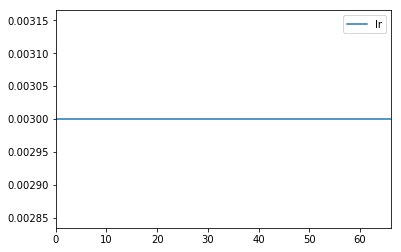

In [26]:
plot_history(nn_model_history, 'lr')

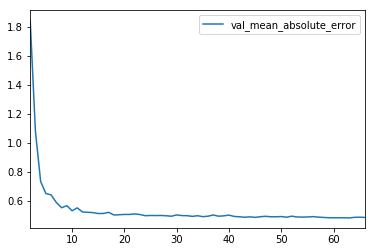

In [34]:
plot_history(nn_model_history, 'val_mean_absolute_error',2)

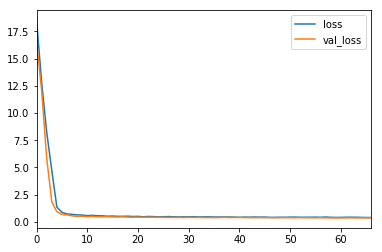

In [27]:
plot_history(nn_model_history, 'loss')

In [136]:
dnnc.evaluate(train_data,train_labels)

1279/1279 [==============================] - 0s 151us/sample - loss: 0.3148 - false_negatives_1: 0.0000e+00 - root_mean_squared_error: 0.5611 - mean_absolute_error: 0.4417


[0.31478830992569673, 0.0, 0.56106, 0.44171286]